This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

$
\newcommand{\dd}{\text{d}}
\newcommand{\e}{\operatorname{e}}
\newcommand{\Fc}{\underline F}
\newcommand{\Hc}{\underline H}
\newcommand{\Xc}{\underline X}
\newcommand{\Yc}{\underline Y}
\newcommand{\Zc}{\underline Z}
\newcommand{\xic}{\underline \xi}
\newcommand{\vc}{\underline v}
\newcommand{\pc}{\underline p}
\newcommand{\Ec}{\underline E}
\newcommand{\kc}{\underline k}
\newcommand{\xiv}{\pmb{\xi}}
\newcommand{\Psiv}{\pmb{\Psi}}
\newcommand{\xivc}{\underline \xiv}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\jj}{\operatorname{j}}
$

# 9 Damping and Damping Layers
## 9.1 Material-Inherent Damping and Structure-Borne Sound
* different damping models (see SDOF oscillator)
* because of harmonic exciation (complex notation), we use structural damping 
* equation for SDOF system with external force
\begin{equation}
-\omega^2 m \xic + \jj \eta s \xic + s \xic = \Fc_e
\end{equation}
with a constant $\eta$ (**loss factor**)
* group the damping and the stiffness term: 
\begin{equation}
-\omega^2 m \xic + (1 +\jj \eta) s \xic = -\omega^2 m \xic + \underline s \xic  =\Fc_e
\end{equation}
- damping effects are hidden in imaginary term of complex-valued stiffness
- generalizing this concept for the axial stress-strain relationship of a slab of elastic material:
\begin{equation}
\underline \sigma = \underline E \underline\epsilon= \left(E+j\eta E\right)\underline\epsilon
\end{equation}
- complex-valued Young's modulus 

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ipywidgets as ipw
%matplotlib inline
t = np.linspace(0,2*np.pi,100)
eps = np.exp(1j*t)

@ipw.interact(eta=(0,0.5,0.02))
def plot_stress_strain(eta=0.02):
    sigma = (1+1j*eta)*eps
    pl.plot(np.real(eps),np.real(sigma))
    pl.xlabel(r'$\epsilon/\hat\epsilon$')
    pl.ylabel(r'$\sigma/\hat\sigma$');
    pl.axis('equal')

interactive(children=(FloatSlider(value=0.02, description='eta', max=0.5, step=0.02), Output()), _dom_classes=…

* potential energy density is
\begin{equation}
w_{pot}=\int_{\epsilon_1}^{\epsilon_2}\sigma\dd\epsilon 
\end{equation}
* if we consider one full cycle, the loss in potential energy is
\begin{equation}
w_{loss}=\eta\hat\epsilon^2\pi E
\end{equation}
which is equivalent to the area of the ellipse in the strain-stress-diagram
* the maximum potential energy stored is simply
\begin{equation}
w_{max}=\frac12 \hat\epsilon^2 E
\end{equation}
* the loss factor is then given by the 
\begin{equation}
\eta=\frac{w_{loss}}{2\pi w_{max}}
\end{equation}
and can be understood as describing the fraction of energy lost in one cycle

## 9.2 Effect of Damping on Waves
* complex modulus leads to complex speed of sound and complex wave numbers

### L-Waves
* quasilongitudinal waves (beam):
\begin{equation}
\underline c_L = \sqrt{\frac{\Ec}{\rho}},\:\: \kc_L=\omega\sqrt{\frac{\rho}{\Ec}}
\end{equation}

In [2]:
import sympy as sy
eta, E, rho, om = sy.symbols("eta E rho omega", positive=True)
# complex modulus
E_ = E*(1+sy.I*eta)
# wave number L-waves
kL = om*sy.sqrt(rho/E)
# substitue complex modulus and find approximation using a series
kL_ = sy.series(kL.subs(E,E_),eta,n=2)
# show factor to apply to lossless case 
display(kL_,sy.simplify(kL_/kL))

omega*sqrt(rho)/sqrt(E) - I*eta*omega*sqrt(rho)/(2*sqrt(E)) + O(eta**2)

1 - I*eta/2 + O(eta**2)

* factor of $(1-\frac{\jj}{2}\eta)$ to approximate damped wavenumber 

### Bending Waves
* bending waves (beam):
\begin{equation}
\underline c_B=\sqrt{\omega}\sqrt[4]{\frac{\underline B}{m'}}=\sqrt{\omega}\sqrt[4]{\frac{\Ec I}{m'}},\:\:
\kc_B = \sqrt{\omega}\sqrt[4]{\frac{m'}{\Ec I}}
\end{equation}

In [3]:
m1, I = sy.symbols("m' I", positive=True)
# wave number bending waves
kB = sy.sqrt(om)*sy.root(m1/(E*I),4)
kB_ = sy.series(kB.subs(E,E_),eta,n=2)
display(kB_,sy.simplify(kB_/kB))

m'**(1/4)*sqrt(omega)/(E**(1/4)*I**(1/4)) - I*eta*m'**(1/4)*sqrt(omega)/(4*E**(1/4)*I**(1/4)) + O(eta**2)

1 - I*eta/4 + O(eta**2)

* factor of $(1-\frac{1}{4}\eta)$ to approximate damped wave number
* plot effect of damping on plane wave 

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import ipywidgets as ipw
%matplotlib inline

@ipw.interact(t=(0,10,0.1),eta_=(0,0.2,0.02))
def plot_xiy_halfbeam(t=0,eta_=0):
    x = np.arange(0,50,0.5)
    # assume amplitudes=1, kB=1, omega=1
    xi = (np.exp(-1j*(1-0.25j*eta_)*x)+np.exp(-1*(1-0.25j*eta_)*x))*np.exp(1j*t)
    # plot everything
    pl.plot(x,xi.real,label=r'$\xi_y$')
    pl.ylim(-3,3)
    pl.xlabel(r'$x$')
    pl.legend()

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), FloatSlider(value=0.0, description='e…

## 9.3 Damping Layers

* metals: high $E$, low $\eta$
* polymers: low $E$, high $\eta$
* combine to have both high $E$ and $\eta$

### Simple Layer

(sketch two layers)
* bending waves on two-layered plate with properties $E_1, \rho_1, h_1, \eta_1$ (metal or similar) and $E_2, \rho_2, h_2, \eta_2$ (viscoelastic material)
* derivation of bending wave equation is the same as for simple plate
  * neutral plane at $y_0$, where no in-plane motion occurs (was at half thickness for simple plate)
  * integration over thickness to get bending stiffness (we got $I'=\frac{h^3}{12}$ for simple plate)
* in-plane stresses for plane wave in $x$-direction
\begin{equation}
\sigma_x= \frac{2G}{1-\mu}\frac{\partial \xi_x}{\partial x}=\frac{E(y)}{1-\mu(y)^2}(y-y_0)\frac{\partial \chi_z}{\partial x}
\end{equation}
* must vanish when integrated over thickness

In [5]:
E1, E2, mu1, mu2, h1, h2 = sy.symbols("E_1 E_2 mu_1 mu_2 h_1 h_2",
                                      positive=True)
y, y0 = sy.symbols("y y_0",positive=True)
# integrate over thickness
i1 = sy.integrate(E1*(y-y0)/(1-mu1**2),(y,0,h1)) # base layer
i2 = sy.integrate(E2*(y-y0)/(1-mu2**2),(y,h1,h1+h2)) # damping layer
# sum of both = 0
y0_ = sy.solve(i1+i2,y0)[0]
display(sy.Eq(y0,y0_))
# assume mu1 = mu2
y0_ = y0_.subs(mu1,mu2).simplify()
display(sy.Eq(y0,y0_))

Eq(y_0, (E_1*h_1**2*mu_2**2/2 - E_1*h_1**2/2 + E_2*h_1*h_2*mu_1**2 - E_2*h_1*h_2 + E_2*h_2**2*mu_1**2/2 - E_2*h_2**2/2)/(E_1*h_1*mu_2**2 - E_1*h_1 + E_2*h_2*mu_1**2 - E_2*h_2))

Eq(y_0, (E_1*h_1**2/2 + E_2*h_1*h_2 + E_2*h_2**2/2)/(E_1*h_1 + E_2*h_2))

* now find the (complex-valued) bending stiffness
\begin{equation}
 \underline B' = \int_0^{h_1+h_2}\Ec(y)(y-y_0)^2dy
\end{equation}

In [6]:
eta1, eta2, B1 = sy.symbols("eta_1 eta_2 B'",positive=True)
# integrate over thickness to get bending stiffness
i1 = sy.integrate(E1*(1+sy.I*eta1)*(y-y0)**2,(y,0,h1))
i2 = sy.integrate(E2*(1+sy.I*eta2)*(y-y0)**2,(y,h1,h1+h2))
B1_ = i1+i2
# display complex bending stiffness
display(sy.Eq(B1,B1_.simplify()))
# display just the real part
display(sy.Eq(B1,sy.collect(sy.re(B1_),(E1,E2))))

Eq(B', E_1*h_1**3*(I*eta_1 + 1)/3 - E_1*h_1**2*y_0*(I*eta_1 + 1) + E_1*h_1*y_0**2*(I*eta_1 + 1) - E_2*h_1**3*(I*eta_2 + 1)/3 + E_2*h_1**2*y_0*(I*eta_2 + 1) - E_2*h_1*y_0**2*(I*eta_2 + 1) + E_2*y_0**2*(h_1 + h_2)*(I*eta_2 + 1) - E_2*y_0*(h_1 + h_2)**2*(I*eta_2 + 1) + E_2*(h_1 + h_2)**3*(I*eta_2 + 1)/3)

Eq(B', E_1*(h_1**3/3 - h_1**2*y_0 + h_1*y_0**2) + E_2*(-h_1**3/3 + h_1**2*y_0 - h_1*y_0**2 + y_0**2*(h_1 + h_2) - y_0*(h_1 + h_2)**2 + (h_1 + h_2)**3/3))

* if layer 1 is metal and layer 2 is polymer, then
\begin{equation}
E_1\gg E_2
\end{equation}
and the bending stiffness is almost the same as for the simple plate
* if layer 2 has much higher damping than layer 1
\begin{equation}
\eta_1\ll \eta_2
\end{equation}

In [7]:
# assume E1>>E2 and compute B1
display(sy.Eq(B1,sy.limit(sy.re(B1_).subs(y0,y0_),E2,0)))
# assume eta1<<eta2 and E1>>E2 and compute eta 
eta_ = sy.limit(sy.im(B1_),eta1,0)/sy.limit(sy.re(B1_),E2,0)
eta_ = eta_.subs(y0,y0_).simplify()
display(sy.Eq(eta,eta_))

Eq(B', E_1*h_1**3/12)

Eq(eta, E_2*eta_2*h_2*(3*E_1**2*h_1**4 + 6*E_1**2*h_1**3*h_2 + 4*E_1**2*h_1**2*h_2**2 + 2*E_1*E_2*h_1*h_2**3 + E_2**2*h_2**4)/(E_1*h_1*(E_1**2*h_1**4 + 2*E_1*E_2*h_1**3*h_2 + 4*E_2**2*h_1**2*h_2**2 + 6*E_2**2*h_1*h_2**3 + 3*E_2**2*h_2**4)))

* assuming $E_1\gg E_2$ further on, the ratio of both bracketed terms is 3:
\begin{equation}
\eta \approx \eta_2\frac{3 E_2 h_2}{E_1 h_1}
\end{equation}
* now let us plot the ratio of the overall loss factor to the loss factor of layer 2

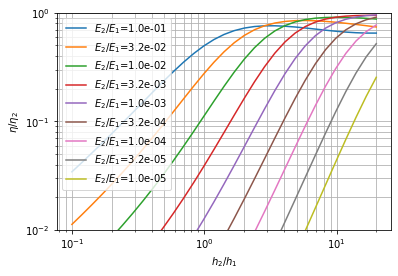

In [8]:
# because we can, we do not make any assumptions in the derivation here
eta_ = (sy.im(B1_)/sy.re(B1_)).subs(y0,y0_)
# make a numeric function
eta__ = sy.lambdify((E1,E2,h1,h2,eta1,eta2),eta_)
h2_ = np.logspace(-1,1.3,31)
for E2_ in np.logspace(-1,-5,9):
    pl.loglog(h2_,eta__(1,E2_,1,h2_,0,1),label=r"$E_2/E_1$=%.1e" % E2_)
pl.ylim(1e-2,1)
pl.legend()
pl.grid(which='both')
pl.xlabel(r"$h_2/h_1$")
pl.ylabel(r"$\eta/\eta_2$");

* the total damping loss depends also on the elasticity of layer 2
* high $E$ of the damping material can be an advantage

### Constrained Layer
(sketch three layers)

* metal - viscoelastic - metal 
* thin plate bending theory not appropriate
* the viscoelastic layer is _sheared_ !
* simplifying assumptions:
  * same material for base and top layers ($E,\rho$)
  * viscoelastic layer has negligible added mass
  * shear damping loss factor for viscoelastic layer is much higher than for base and top layer
* results (without derivation):
\begin{gather}\label{eq:constrained}
B' = (B'_1+B'_3)\left(1+\frac{a_1 a_2}{k_B^2+a_2}\right)\\
B'_{1/3}=E\frac{h^3_{1/3}}{12 (1-\mu^2)}\\
a_1 = \frac{\left(h_2+\frac12\left(h_1+h_2\right)\right)^2}{B'_1+B'_3}\frac{E h_1 h_3}{h_1+h_3}\\
a_2 = \frac{G}{h_2}\frac{h_1+h_3}{E h_1 h_3}\\
k_B = \sqrt{\omega}\sqrt[4]{\frac{\rho_1(h_1+h_3)}{B'}}\\
a_3 = \frac{a_2}{k_B^2}\\
\eta = \frac{\eta_2 a_3 a_1}{1+(2+a_1)a_3+(1+a_1)(1+\eta_2^2)a_3^2}
\end{gather}
* requires solution of high order polynomial roots for $B'$
* result is frequency-dependent
* special case: viscoelastic layer is very soft (low $G$):
\begin{equation}
B' = B'_1+B'_3
\end{equation}
* lets us put all equations together:

In [9]:
# extra symbols
E, rho, G, h3, mu = sy.symbols("E rho G h_3 mu",positive=True)
# bending stiffness of layer 1 and layer 3
B11 = E*h1**3 / 12/(1-mu**2)
B13 = E*h3**3 / 12/(1-mu**2)
# terms a1, a2 , kB, a3
a1 = (h2+(h1+h3)/2)**2/(B11+B13) * E* h1*h3/(h1+h3)
a2 = G / h2 * (h1+h3)/E/h1/h3
kB2 = sy.sqrt(rho*(h1+h3)/B1)*om
a3 = a2/kB2
B1_ = (B11+B13)*(1+a1*a2/(kB2+a2))
# total loss factor of three-layer plate
etat = eta2* a3*a1/(1+(2+a1)*a3+(1+a1)*(1+eta2**2)*a3**2)
# substitute B' for low G case
etat = etat.subs(B1,B11+B13).simplify()
etat

6*sqrt(3)*E**(7/2)*G*eta_2*h_1**2*h_2*h_3**2*omega*rho*(h_1**3 + h_3**3)*(mu**2 - 1)*(h_1 + 2*h_2 + h_3)**2/(sqrt((-h_1**3 - h_3**3)/(mu**2 - 1))*(2*sqrt(3)*E**(7/2)*G*h_1*h_2*h_3*omega*rho*sqrt((-h_1**3 - h_3**3)/(mu**2 - 1))*(mu**2 - 1)*(-3*h_1*h_3*(mu**2 - 1)*(h_1 + 2*h_2 + h_3)**2 + 2*(h_1 + h_3)*(h_1**3 + h_3**3)) + 12*E**4*h_1**2*h_2**2*h_3**2*omega**2*rho**(3/2)*sqrt(h_1 + h_3)*(h_1**3 + h_3**3)*(mu**2 - 1) - E**3*G**2*sqrt(rho)*(eta_2**2 + 1)*sqrt(h_1 + h_3)*(h_1**3 + h_3**3)*(-3*h_1*h_3*(mu**2 - 1)*(h_1 + 2*h_2 + h_3)**2 + (h_1 + h_3)*(h_1**3 + h_3**3))))

* because this expression is very complicated, we just plot an example case:
  * $h1=h3=$ 1 mm
  * $h2=$ 0.5 mm
  * Steel base and top: $E =$ 210 GPa, $\rho=$ 7800 kg/m³, $\mu =$ 0.3
  * different $G$ and $\eta_2$ for viscoelastic material

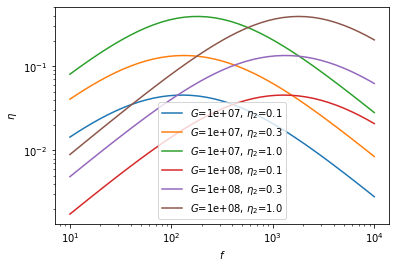

In [11]:
etat_ = sy.lambdify((E,mu,G,rho,eta2,h1,h2,h3,om),etat)
f_ = np.logspace(1,4,41)
for G_ in np.logspace(7,8,2):
    for eta2_ in (0.1,0.3,1):
        etat__ = etat_(2.1e11,0.3,G_,7800,eta2_,1e-3,5e-4,1e-3,2*np.pi*f_)
        pl.loglog(f_,etat__,label=r"$G$=%.0e, $\eta_2$=%.1f" % (G_,eta2_))
pl.legend()
pl.xlabel(r"$f$")
pl.ylabel(r"$\eta$");

#### ----------------------------------------
* material-inherent damping using structural damping model
* loss factor has effect on wave amplitude
* damping layers allow combination of stiff and highly damped materials
* constrained layers allow high damping with less added mass
* next topic: finite length beams - modes and excitation

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Structure-borne sound lecture notes, 2019.

In [7]:
# this is just for custom formatting
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()